In [2]:
# necessary import
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Solution 1

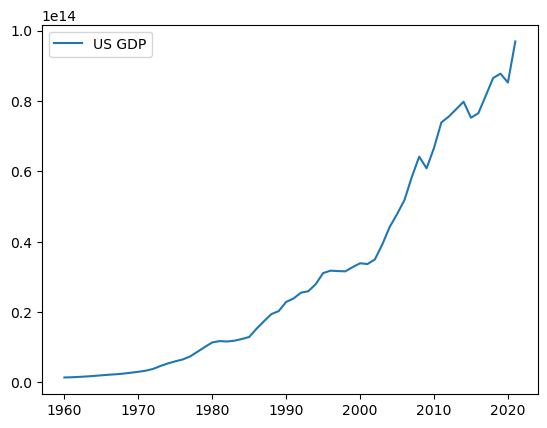

In [3]:
# given code
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np

gdp_data = wb. download(indicator='NY.GDP.MKTP.CD',country='WLD', start='1960',end='2021')
time = np.arange (1960 ,2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
# Data is returned in inverse chronological order , so reverse order
gdp = np.flip(gdp)
# Plot world GDP data against time
plt.plot(time,gdp,label= 'US GDP')
plt.legend()
plt.show()

### 1.a
Given the world’s GDP growth equation\
$GDP_k = GDP_0 \cdot (1 + r)^k$\
Taking natural log both sides we get a linear equation\
$\ln(GDP_k) = \ln(GDP_0) + k \ln(1 + r)$\
Hence the transformation used is **logarithmic transformation** to get a linear relationship

### 1.b

In [5]:
# applying logarithmic on gdp calculated above
gdp_linear = np.log(gdp)

# performing linear regression against the time variable
params = stats.linregress(time, gdp_linear)

# obtained linear regression parameters slope and intercept
slope = params.slope
intercept = params.intercept

$R^2 Value$ (Coefficient of Determination) obtained from params.rvalue

In [6]:
R_sq_value = (params.rvalue**2)

# regression line equation obtained after applying linregress module
GDP = time*slope + intercept

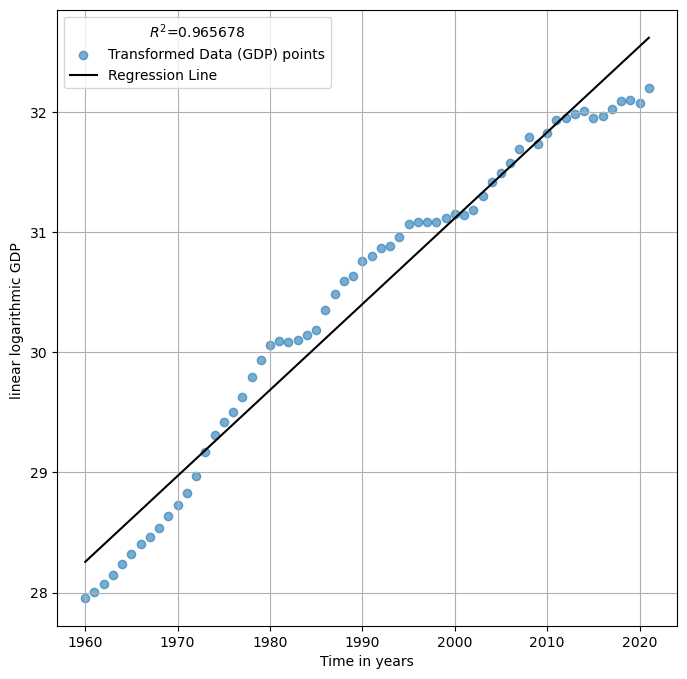

In [7]:
# plot displaying regression line, a scatter-plot of the (transformed) data points, R2 value

# defining the size of the plot
plt.rcParams["figure.figsize"] = (8,8)

# scatter plot for the transformed GDP data points
plt.scatter(time, gdp_linear, alpha = 0.6, cmap = 'BrBG', label = 'Transformed Data (GDP) points')

# plot displaying regression line
plt.plot(time, GDP, color='black', label= 'Regression Line')

# labels and R2 value 
plt.xlabel('Time in years')
plt.ylabel('linear logarithmic GDP ')
plt.legend(title = r'$R^2$'+'={:2f}'.format(R_sq_value))


plt.grid(True)
plt.show()

### 1.c

In [8]:
# computing the residuals of regression (from taking gdp_linear{log(gdp)} - GDP{calculated from linear regression equation})
residuals = gdp_linear - GDP

# calculating displaying mean and standard deviation of the residuals
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)

print('Mean of Residuals : {}'.format(residuals_mean))
print('Standard Deviation of Residuals : {}'.format(residuals_std))

Mean of Residuals : 8.136860361123729e-15
Standard Deviation of Residuals : 0.24144627148321043


In [9]:
# performing KS-test to obtain p-value for hypothesis testing
params = stats.kstest(residuals, stats.norm.cdf, args= (residuals_mean,residuals_std))

# assigning variable
p_value = params.pvalue

print("Obtained p-value: {}".format(p_value))

Obtained p-value: 0.2211569155807066


Given **confidence interval** $alpha$ 99%, hence the significance level (1 - $alpha)/2$ =0.005 **(two-sided testing)**

In [10]:
# confidence interval alpha = 99% (given in question)
alpha = 0.99 

In [11]:
# performing hypothesis testing
if p_value < (1-alpha)/2:
    print ('reject the null hypothesis that the residuals are sampled from a normal distribution with mean 0 and standard deviation ˆσ.')
else:
    print ("can't reject the null hypothesis that the residuals are sampled from a normal distribution with mean 0 and standard deviation ˆσ.")
    

can't reject the null hypothesis that the residuals are sampled from a normal distribution with mean 0 and standard deviation ˆσ.


### 1.d

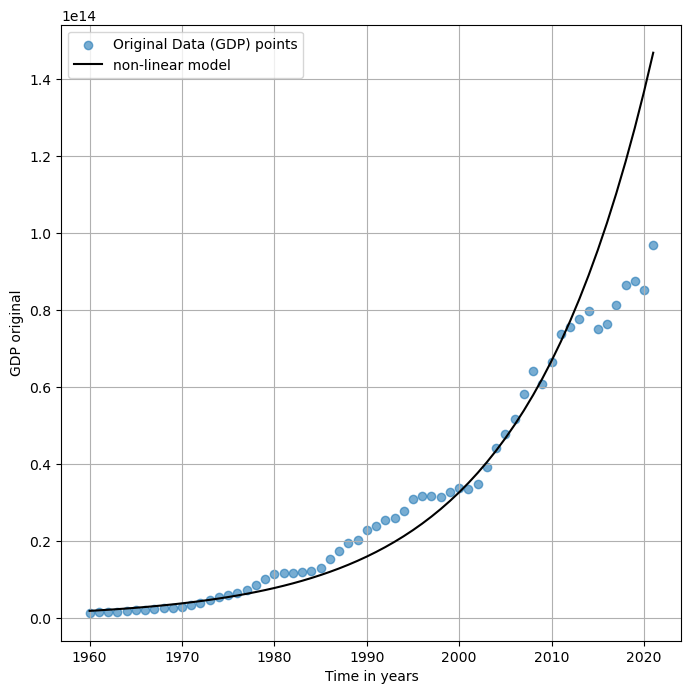

In [12]:
# applying inverse of logarithmic transform to linear model (GDP calculated in 1b) to get a non-linear model of GDP
GDP_inverse = np.exp(GDP)

# defining the size of the plot
plt.rcParams["figure.figsize"] = (8,8)

# scatter plot with the original GDP data points
plt.scatter(time, gdp, alpha = 0.6, cmap = 'BrBG', label = 'Original Data (GDP) points')

# plot of non-linear model
plt.plot(time, GDP_inverse, color='black', label= 'non-linear model')

# labels
plt.xlabel('Time in years')
plt.ylabel('GDP original')
plt.legend()
plt.grid(True)
plt.show()

### 1.e

Considering our derived linear equation with **k as the predictor**:\
$\ln(GDP_k) = \ln(GDP_0) + k \ln(1 + r)$ \
**intercept** = $ln(GDP_0)$ and **slope** = ${ln(1+r)}$, where **r represents the long-term growth rate of the
world GDP**. Thus taking **antilog both sides and rearranging the equations we get the relationship between the slope of the regression and the long-term growth rate given as**\
r = $e^{slope}-1$

In [13]:
r = np.exp(slope)-1
print("long-term growth rate of the world GDP : {:.2f}%".format(r*100))

long-term growth rate of the world GDP : 7.42%


### 1.f

In [14]:
# as observed from the gdp dataset
gdp_data.head(7)

NY.GDP.MKTP.CD
country year                
World   2021    9.688240e+13
        2020    8.521515e+13
        2019    8.772810e+13
        2018    8.650222e+13
        2017    8.144205e+13
        2016    7.648645e+13
        2015    7.521506e+13

GDP has **monotonically** increased since 2015 to 2021 with **slight intonation** in 2020, but the **rate of increase is not constant resulting in the deviation of the dataset from its linear line trajectory as observed from the above graph 1.d**.

# Solution 2

linear regression model with error tearm\
$y_i = a x_i + b + \varepsilon_i$ , where $a = \frac{1}{2},\quad b = 2,\quad \varepsilon_i \sim \mathcal{N}(0, \frac{1}{5}), \quad 1 \leq i \leq N$

### 2.a

In [15]:
# given paramters 
N = 200
#slope
a = 1/2
# intercept
b = 2

# sample space
samples = 10000
# error mean
error_mean = 0
#error variance
error_var = 1/5
#error standard deviation
error_std_dev = np.sqrt(1/5)

# given x 
x = np.linspace(-5, 5, N)

# calculated bins for the histogram 
bins = int(np.sqrt(samples))

In [16]:
# initialising slope and intercept for the linear regression with error term varying as a normal distribution 
slope_norm = np.zeros(samples)
intercepts_norm = np.zeros(samples)

In [17]:
# loop to generate 10000 terms
for value in range(samples):
    
    # Generate 10000 sets of error vectors
    error = stats.norm.rvs(loc=0, scale = error_std_dev, size = N)
    
    # Perform 10000 linear regression of the Ndimensional vectors (y) against (x)
    y = a*x + b + error
    params = stats.linregress(x,y)
    
    # 2.b Collecting the slopes and the intercepts of these 10000 linear regressions in variable initialised above
    slope_norm[value] = params.slope
    intercepts_norm[value] = params.intercept

### 2.b

Calculation the scale for the theoretical normal density of the slope using the equation of normal error for $\hat{\beta}_1$ given by\
$\hat{\beta}_1 \overset{\text{}}{\sim} N\left(\beta_1, \frac{\sigma^2}{\sum_{i}(x_i -\bar{x})^2}\right)$


In [18]:
# using 'loc' value as the given slope a = 0.5 and 'scale' calculated from above equation
slope_norm_dist = stats.norm(loc = a, scale = np.sqrt(error_var/np.sum((x - np.mean(x))**2)))

# defining line space for theoretical normal density of the slope 
sample_space_slope = np.linspace(slope_norm_dist.ppf(0.0001), slope_norm_dist.ppf(0.9999), 10000)

# theoretical denstiy of the slope
slope_theoretical = slope_norm_dist.pdf(sample_space_slope)

Calculation the scale for the theoretical normal density of the intercept using the equation of normal error for $\hat{\beta}_0$ given by  
$\hat{\beta}_0 \overset{\text{}}{\sim} N\left(\beta_0, \frac{\sigma^2 \sum_{i} x_i^2}{n \sum_{i} (x_i - \bar{x})^2}\right)$


In [19]:
# calculating the standard deviation obtained from the above equation
intercept_std_dev = np.sqrt((error_var)* np.sum(x**2)/(N * np.sum((x - np.mean(x))**2)))

# using 'loc' value as the given slope b = 2 and 'scale' calculated from above equation
intercept_norm_dist = stats.norm(loc = b, scale = intercept_std_dev)

# defining line space for theoretical normal density of the slope 
sample_space_intercept = np.linspace(intercept_norm_dist.ppf(0.0001),intercept_norm_dist.ppf(0.9999), 10000)

# theoretical denstiy of the intercept
intercept_theoritical = intercept_norm_dist.pdf(sample_space_intercept)

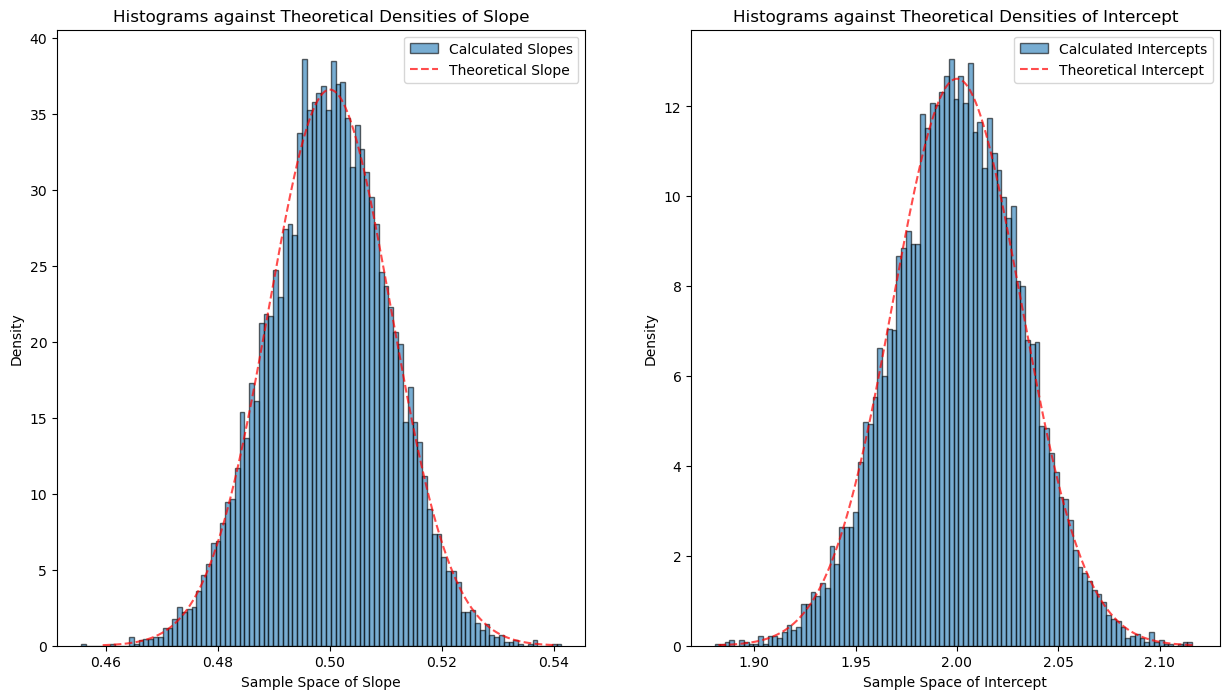

In [20]:
# defining paramters for the sub plots
plot, measures = plt.subplots(ncols=2, nrows=1, figsize=(15,8))

# details for first plot
# histogram of the calculated slope 
measures[0].hist(slope_norm, bins = bins, density =True, alpha = 0.6,edgecolor = 'black', label = "Calculated Slopes")
# density plot for the Theoretical slope
measures[0].plot(sample_space_slope, slope_theoretical, alpha = 0.7,color = 'r', linestyle='--', label = 'Theoretical Slope')

# defining labels and titles
measures[0].set_xlabel("Sample Space of Slope")
measures[0].set_ylabel("Density")
measures[0].set_title("Histograms against Theoretical Densities of Slope")
measures[0].legend()

#details for second plot
# histogram of the calculated intercept 
measures[1].hist(intercepts_norm, bins= bins, density=True, alpha = 0.6, edgecolor = 'black', label = "Calculated Intercepts")
# density plot for the Theoretical intercept
measures[1].plot(sample_space_intercept, intercept_theoritical, alpha = 0.7,color = 'r', linestyle='--', label = "Theoretical Intercept")

# defining labels and titles
measures[1].set_xlabel("Sample Space of Intercept")
measures[1].set_ylabel("Density")
measures[1].set_title("Histograms against Theoretical Densities of Intercept")
measures[1].legend()

#displaying the plot
plt.show()


**Observation from both plots of Slope and Intercept**
1. The **histogram of slope and intercept represents the plot obtained by introducing a random error term and calculating their density**. As observed from the plots, **this coincides with the result obtained by using the statistical formulae of normal error for calculating the densities of the Slope and Intercept represented in the plots by the normal distribution curve**. 
2. The **histogram** for both the slope and the intercept **peaks at the mean this is consistent with their theoretical counterpart values of slope a =1/5 & b =2** , thus explaining that the **simulation result obtained from the histogram aligns with the theoretical result or in other words, it is a good estimator of theoretical plot**.

### 2.c

In [21]:
# given paramters 
N = 200
#slope
a = 1/2
# intercept
b = 2

# sample space
samples = 10000
# error mean
error_mean = 0
#error variance
error_var = 1/5
#error standard deviation
error_std_dev = np.sqrt(1/5)

# given x 
x = np.linspace(-5, 5, N)

# calculated bins for the histogram 
bins = int(np.sqrt(samples))

In [22]:
# initialising slope and intercept for calculating the test statistic
slope_t = np.zeros(samples)
intercepts_t = np.zeros(samples)

the error terms for the slope and intercepts are given by \
$ \text{slope error} = \frac{\sqrt{\sum_{i=1}^{N} (y_i - \hat{\beta}_1 x_i - \hat{\beta}_0)^2 / (N - 2)}}{\sqrt{\sum_{i=1}^{N} (x_i - \bar{x})^2}}$

$ \text{intercept error} = \frac{\sqrt{\sum_{i=1}^{N} (y_i - \hat{\beta}_1 x_i - \hat{\beta}_0)^2 \sum_{i=1}^{N} (x_i - \bar{x})^2}}{\sqrt{N(N-2) \sum_{i=1}^{N} (x_i - \bar{x})^2}}$



In [23]:
# loop for generating 10000 terms
for value in range(samples):
    # error variation remains the same
    error = stats.norm.rvs(loc=0, scale = error_std_dev, size=N)
    
    # Perform 10000 linear regression of the Ndimensional vectors (y) against (x)
    y = a*x + b + error
    params = stats.linregress(x,y)
    
    # calculating the standrad error term of slope for test Statistics
    se_slope = np.sqrt(np.sum((y - params.slope * x - params.intercept)**2) / (N - 2)) / np.sqrt(np.sum((x - np.mean(x))**2))
    
    # calculating the standrad error term of intercept for test Statistics
    se_intercept_deno = np.sum(np.square(y - params.slope * x - params.intercept)) * np.sum(np.square(x))
    se_intercept_num = N*(N - 2)*np.sum(np.square(x - np.mean(x)))
    
    # substituting those values in the variables specified above
    slope_t[value] = (params.slope - a)/se_slope
    intercepts_t[value] = (params.intercept - b)*np.sqrt(se_intercept_num)/np.sqrt(se_intercept_deno)
    

In [24]:
# defining density for computing the test statistic for the slope 
slope_t_dist = stats.t(loc = 0, scale = 1, df = N-2)

# defining line space for the density
sample_space_slope_t = np.linspace(slope_t_dist.ppf(0.0001), slope_t_dist.ppf(0.9999), 10000)

In [25]:
# defining density for computing the test statistic for the intercept 
intercept_t_dist = stats.t(loc = 0, scale = 1, df = N-2)

# defining line space for the density
sample_space_intercept_t = np.linspace(intercept_t_dist.ppf(0.0001), intercept_t_dist.ppf(0.9999), 10000)

In [26]:
# denstiy of the slope calculated for test statistic
slope_theotrical_t = slope_t_dist.pdf(sample_space_slope_t)

# denstiy of the intercept calculated for test statistic
intercept_theoitical_t = intercept_t_dist.pdf(sample_space_intercept_t)

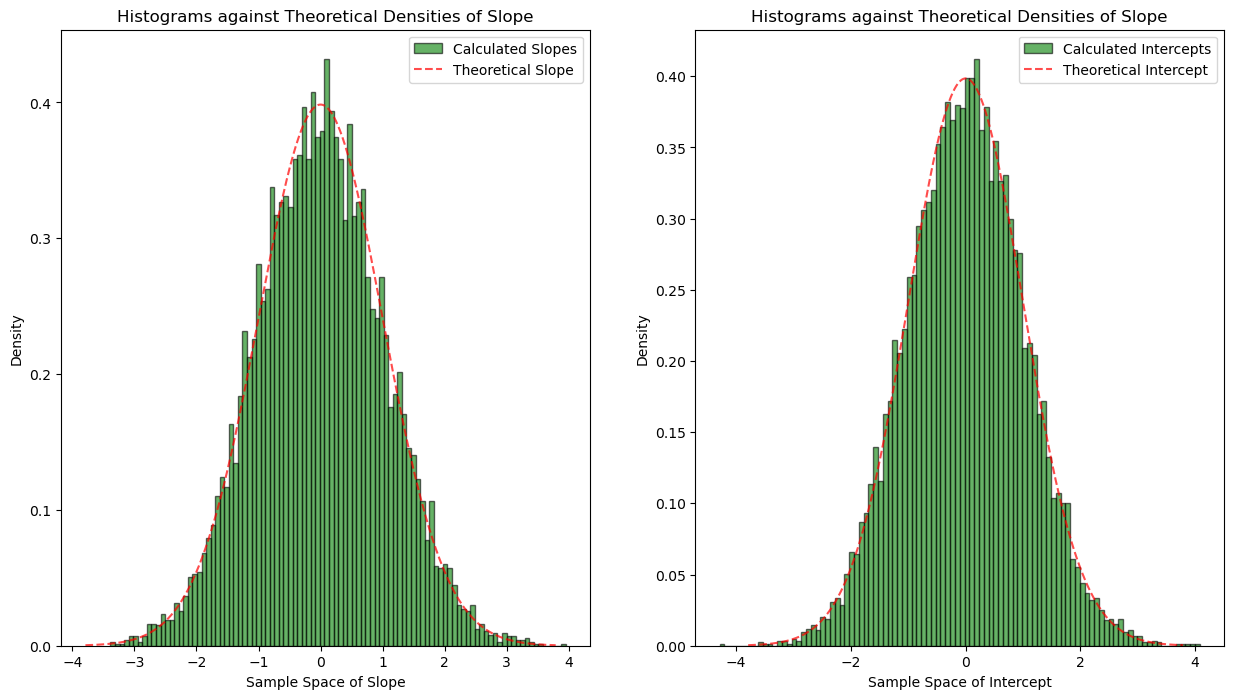

In [27]:
# defining paramters for the sub plots
plot, measures = plt.subplots(ncols=2, nrows=1, figsize=(15,8))

# details for first plot
# histogram of the calculated slope
measures[0].hist(slope_t, bins = bins, density =True, alpha = 0.6,edgecolor = 'black',color = 'green', label = "Calculated Slopes")
# density plot for the Theoretical slope
measures[0].plot(sample_space_slope_t, slope_theotrical_t, alpha = 0.7,color = 'r', linestyle='--', label = 'Theoretical Slope')

# defining labels and titles
measures[0].set_xlabel("Sample Space of Slope")
measures[0].set_ylabel("Density")
measures[0].set_title("Histograms against Theoretical Densities of Slope")
measures[0].legend()

#details for second plot
# histogram of the calculated intercept
measures[1].hist(intercepts_t, bins= bins, density=True, alpha = 0.6, edgecolor = 'black',color = 'green', label = "Calculated Intercepts")
# density plot for the Theoretical intercept
measures[1].plot(sample_space_intercept_t, intercept_theoitical_t, alpha = 0.7,color = 'r', linestyle='--', label = "Theoretical Intercept")

# defining labels and titles
measures[1].set_xlabel("Sample Space of Intercept")
measures[1].set_ylabel("Density")
measures[1].set_title("Histograms against Theoretical Densities of Slope")
measures[1].legend()

#display the plot
plt.show()

***Observation*** \
The histogram of slope and intercept plots **discloses whether the calculated slope and intercepts are consistent with the null hypothesis (mean is zero)**. The **histogram closely matches the theoretical densities (t-distribution) and indicates that the test statistics behave as expected under the linear regression model's assumptions**.

### 2.d

In [28]:
# confidence interval alpha = 99% (given in question)
alpha = 0.99

In [29]:
# last value of slope and intercept extracted from their respective array calcualted for test-statistic 
last_test_stat_slope = slope_t[-1]
last_test_stat_intercept = intercepts_t[-1]

**As the null-hypothesis (Ho) here is non-directional and as the two-sided test allows the detection of critical regions in both directions (greater than or smaller than Ho), I am using the two-sided test in this question**

$ \text{First test: } H_0 : a = \frac{1}{2} \quad (\text{assuming } b = 2) $

In [30]:
#since it is a two-sided test
# p-value of the last slope value of the test statistic computed using t-distribution
p_value_slope = (1-stats.t.cdf(abs(last_test_stat_slope), df = N-2))*2
print("Obtained p-value for last slope sample is {}".format(p_value_slope))

Obtained p-value for last slope sample is 0.1467891618237751


In [31]:
# first test
if p_value_slope<(1-alpha)/2:
    print ('null hypothesis is rejected for first test')
else:
    print ("can't reject null hypothesis for first test")

can't reject null hypothesis for first test


$ \text{Second test: } H_0 : b = 2 \quad (\text{assuming } a = \frac{1}{2}) $

In [32]:
#since it is a two-sided test
# p-value of the last intercept value of the test statistic computed using t-distribution
p_value_intercept = (1-stats.t.cdf(abs(last_test_stat_intercept), df = N-2))*2
print("Obtained p-value for last intercept sample is {}".format(p_value_intercept))

Obtained p-value for last intercept sample is 0.8768907937685693


In [33]:
# second test
if p_value_intercept<(1-alpha)/2:
    print ('null hypothesis is rejected for second test')
else:
    print ("can't reject null hypothesis for second test")

can't reject null hypothesis for second test


### 2.e

$y_i = ax_i + b + \varepsilon_i \quad \text{where} \quad a = \frac{1}{2}, \quad b = 2, \quad \varepsilon_i \sim \text{Cauchy}(0, \frac{1}{5}), \quad 1 \leq i \leq N$

In [34]:
# given paramters 
N = 200
#slope
a = 1/2
# intercept
b = 2

# sample space
samples_size = 10000
# error mean
error_mean = 0
# given x 
x = np.linspace(-5, 5, N)

# calculated bins for the histogram 
bins = int(np.sqrt(samples))

In [35]:
# initialising slope and intercept
slope_c = np.zeros(samples)
intercepts_c = np.zeros(samples)

In [36]:
# loop for generating 10000 terms
for value in range(samples_size):
    # error variation is a Cauchy distribution
    error = stats.cauchy.rvs(loc=0, scale = 1/5, size=N)
    
    # Perform 10000 linear regression of the Ndimensional vectors (y) against (x)
    y = a*x + b + error
    params = stats.linregress(x,y)
    
    # Collecting the slopes and the intercepts of these 10000 linear regressions in variable initialised above
    slope_c[value] = params.slope
    intercepts_c[value] = params.intercept

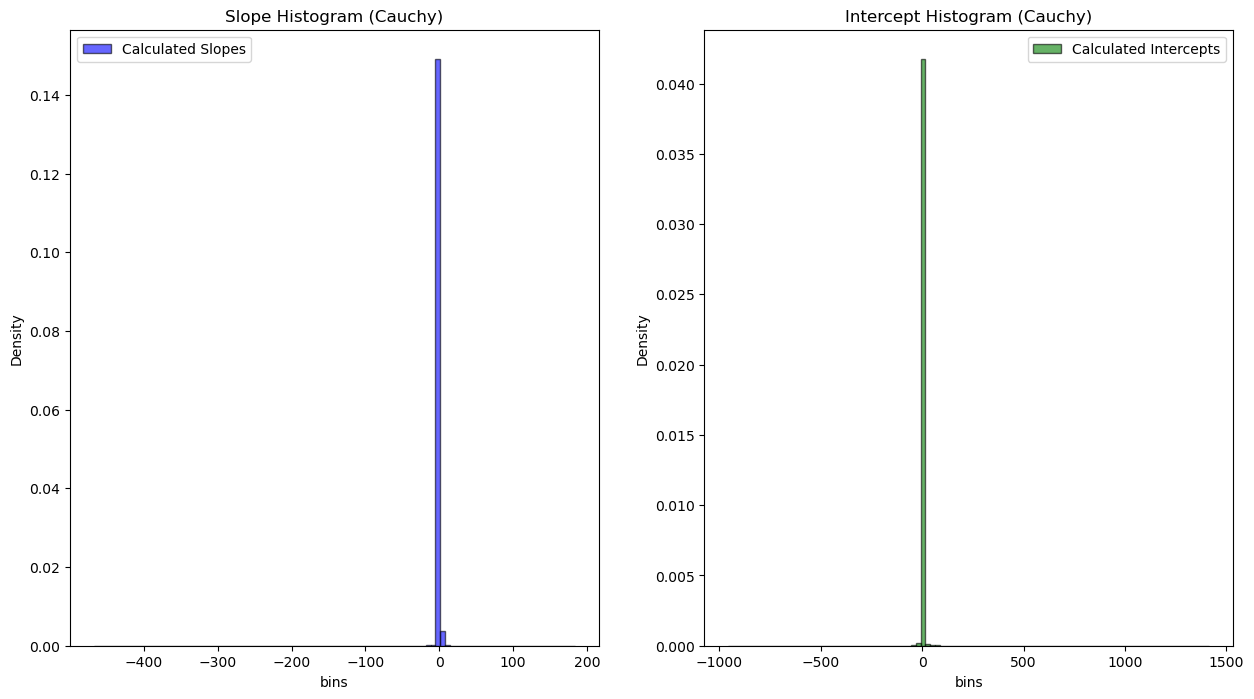

In [37]:
# defining paramters for the sub plots
plot, measures = plt.subplots(ncols=2, nrows=1, figsize=(15,8))

# details for first plot
# histogram of the calculated slope
measures[0].hist(slope_c, bins = bins, density =True, alpha = 0.6,edgecolor = 'black',color = 'blue', label = "Calculated Slopes")

# defining labels and titles
measures[0].set_xlabel("bins")
measures[0].set_ylabel("Density")
measures[0].set_title("Slope Histogram (Cauchy)")
measures[0].legend()


#details for second plot
# histogram of the calculated intercept
measures[1].hist(intercepts_c, bins= bins, density=True, alpha = 0.6, edgecolor = 'black',color = 'green', label = "Calculated Intercepts")

# defining labels and titles
measures[1].set_xlabel("bins")
measures[1].set_ylabel("Density")
measures[1].set_title("Intercept Histogram (Cauchy)")
measures[1].legend()

#display the plot
plt.show()


***Observation***\
The Cauchy-distributed errors on both plots are visible, significantly affecting the entire histogram due to the extreme value at the mean($\mu\$=0) in both plots.
